## Data generation and fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

In [2]:
%run dataset_generator.py

In [3]:
no = 50

In [4]:
def f(x):
    pi = np.pi
    return 2*np.sin((1/6) *pi*x) #+ 1e-2*np.exp(x**0.75) + 0.5*x

In [5]:
def basis(x,m):
    for j in range(m):
        y = x**j
    return y

In [6]:
X,Y,t,e = dataset_generator(0,12,no,0,0.5**2,f)

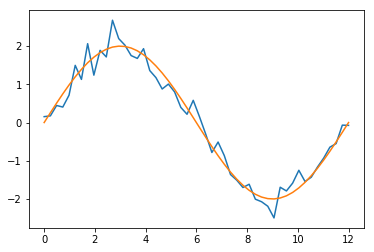

In [7]:
plt.figure()
plt.plot(X,t,'o',label='Data', markerfacecolor="None")
plt.plot(X,Y,label='Function')
plt.legend()

x = X
m = 20
#import numpy as np
phi = np.zeros((len(x),m))

for i in range(len(x)):
    for j in range(m):
        #print(j)
        phi[i][j] = x[i]**j
        #print("\n")
        #print("Line")
        #print(i)

In [8]:
x = X
m = 5
#import numpy as np
phi = np.array([x**j for j in range(m)])
phi = np.reshape(phi.T,(len(x),m))
W = np.linalg.pinv(phi)@t
W.shape, phi.shape

((5, 1), (50, 5))

In [10]:
y_pred = phi@W

## <font color='red' >Here, the model explode from the original curve in higher values of 'm'.</font>

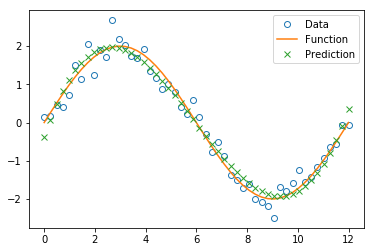

In [11]:
plt.figure()
plt.plot(X,t,'o',label='Data', markerfacecolor="None")
plt.plot(X,Y,label='Function')
plt.plot(X,y_pred,'x',label='Prediction')
plt.legend()

### Model Selection

We'll select the data and split the dataset.

plt.figure()
plt.plot(X,t,label='Data')
plt.plot(X,Y,label='Function')
plt.plot(X,y_pred.T,'--r',label='Prediction')
plt.axvline(4,c='k')
plt.axvline(8,c='k')
plt.legend()